In [28]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,GlobalAvgPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os 
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

In [2]:
brain_tumor=os.path.join("Brain_Tumor_Data_Set","Brain Tumor")

In [3]:
print(brain_tumor)

Brain_Tumor_Data_Set\Brain Tumor


In [4]:
len(os.listdir(brain_tumor))

2513

the data is of different formats and let us also check the shapes of the data in the folder

tumor_brains


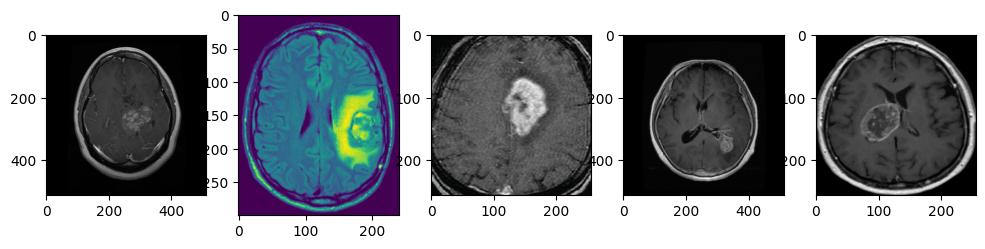

In [5]:
figure=plt.figure(figsize=(12,5))
j=0
print("tumor_brains")
for i in os.listdir(brain_tumor)[0:5]:
    plt.subplot(1,5,j+1)
    img=Image.open(os.path.join(brain_tumor,i))
    plt.imshow(img)
    j+=1

from the image we can see the image is in the different channels and we are also having the image in the different shapes

Healthy Brains


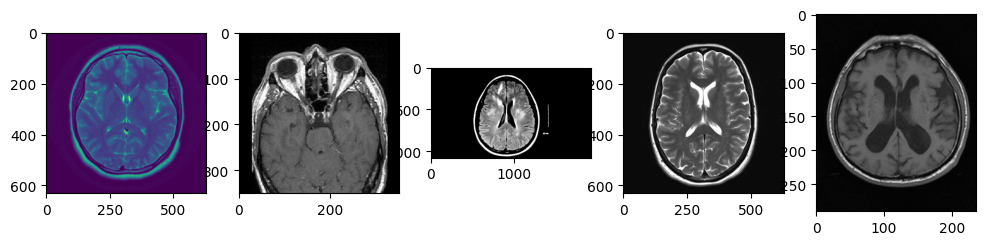

In [6]:
figure=plt.figure(figsize=(12,5))
j=0
healthy_brain=os.path.join("Brain_Tumor_Data_Set","Healthy")
print("Healthy Brains")
for i in os.listdir(healthy_brain)[0:5]:
    img=Image.open(os.path.join(healthy_brain,i))
    plt.subplot(1,5,j+1)
    plt.imshow(img)
    j+=1

In [7]:
len(os.listdir(healthy_brain))

2087

In [8]:
# we can use flow_from_directory which helps to convert the images into the rgb format only
datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [9]:
training_data=datagen.flow_from_directory(
    "Brain_Tumor_Data_Set",
    target_size=(224,224),      
    batch_size=32,          
    class_mode="binary",        
    subset="training" 
)

Found 3681 images belonging to 2 classes.


In [10]:
validation_data=datagen.flow_from_directory(
    "Brain_Tumor_Data_Set",
    target_size=(224,224),      
    batch_size=32,          
    class_mode="binary",        
    subset="validation" 
)

Found 919 images belonging to 2 classes.


now let us bulid the model 

# VGG16

In [11]:
base_model1=VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))

In [12]:
base_model1.trainable=False

In [13]:
x=base_model1.output
x=Flatten() (x)
x=Dense(64,activation='relu')(x)
x=Dense(32,activation='relu')(x)
output=Dense(1,activation='sigmoid')(x)


In [14]:
model=Model(inputs=base_model1.input,outputs=output)

In [15]:
model.summary()

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
model.fit(training_data,epochs=3,validation_data=validation_data)

In [18]:
model.save('vgg16_model.h5')

# ResNet 50

In [19]:
base_model2=ResNet50(weights ="imagenet",include_top=False,input_shape=(224,224,3))

In [20]:
base_model2.trainable=False

In [21]:
x=base_model2.output
x=GlobalAvgPool2D() (x)
x=Dense(64,activation='relu')(x)
x=Dense(32,activation='relu')(x)
output=Dense(1,activation='sigmoid')(x)


In [22]:
model1=Model(inputs=base_model2.input,outputs=output)

In [23]:
model1.summary()

In [24]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
model1.fit(training_data,epochs=10,validation_data=validation_data)

In [26]:
model1.save("ResNet_model.h5")

In [ ]:
from scipy.stats import mode
from tensorflow.keras.models import load_model

In [8]:
model1=load_model("vgg16_model.h5")
model2=load_model("ResNet_model.h5")

In [59]:
output=[]
def ensemble_prediction(model1,model2,img):
    output1=0 if model1.predict(img)[0] < 0.5 else 1
    output2=0 if model2.predict(img)[0] <0.5 else 1
    output.append(output1)
    output.append(output2)
    pre,_= mode(output)
    return pre
    

In [32]:
img=Image.open("braintumor.jpg")

L


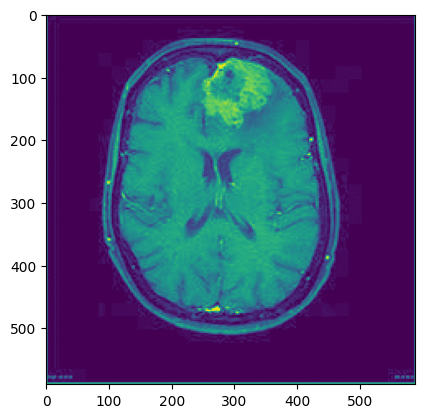

In [33]:
print(img.mode)
plt.imshow(img)

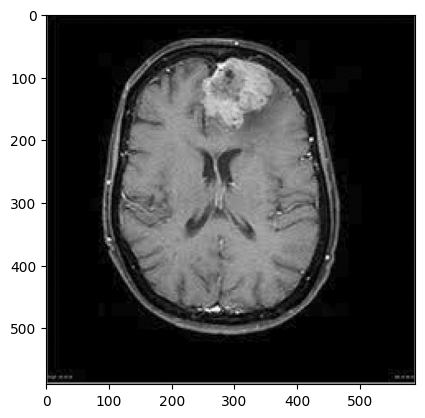

In [34]:
img=img.convert('RGB')
plt.imshow(img)

In [35]:
img=img.resize((224,224))
img=np.array(img)/255

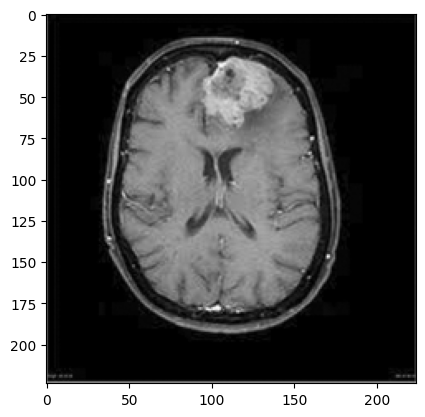

In [36]:
plt.imshow(img)

In [39]:
print(img.shape)

(224, 224, 3)


In [47]:
img=img.reshape((1,224,224,3))

In [61]:
if(ensemble_prediction(model1,model2,img)==0):
    print('tumor brain')
else:
    print("healty brain")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
tumor brain
